In [ ]:
%reload_ext autoreload
%autoreload 2

In [1]:
import pdb

import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical

from polygen.modules.data_modules import PolygenDataModule, CollateMethod
from polygen.modules.vertex_model import ImageToVertexModel
from polygen.modules.face_model import FaceModel
import polygen.utils.data_utils as data_utils

In [2]:
img_data_module = PolygenDataModule(data_dir = "image_meshes/", 
                                    collate_method = CollateMethod.IMAGES,
                                    batch_size = 4,
                                    training_split = 1.0,
                                    val_split = 0.0,
                                    use_image_dataset = True,
                                    img_extension = "png",
                                    apply_random_shift_vertices = False,
)

face_data_module = PolygenDataModule(data_dir = "image_meshes/", 
                                    collate_method = CollateMethod.FACES,
                                    batch_size = 4,
                                    training_split = 1.0,
                                    val_split = 0.0,
                                    use_image_dataset = True,
                                    img_extension = "png",
                                    apply_random_shift_faces = False,
                                    shuffle_vertices = False,
)

img_data_module.setup()
face_data_module.setup()

img_dataset = img_data_module.shapenet_dataset

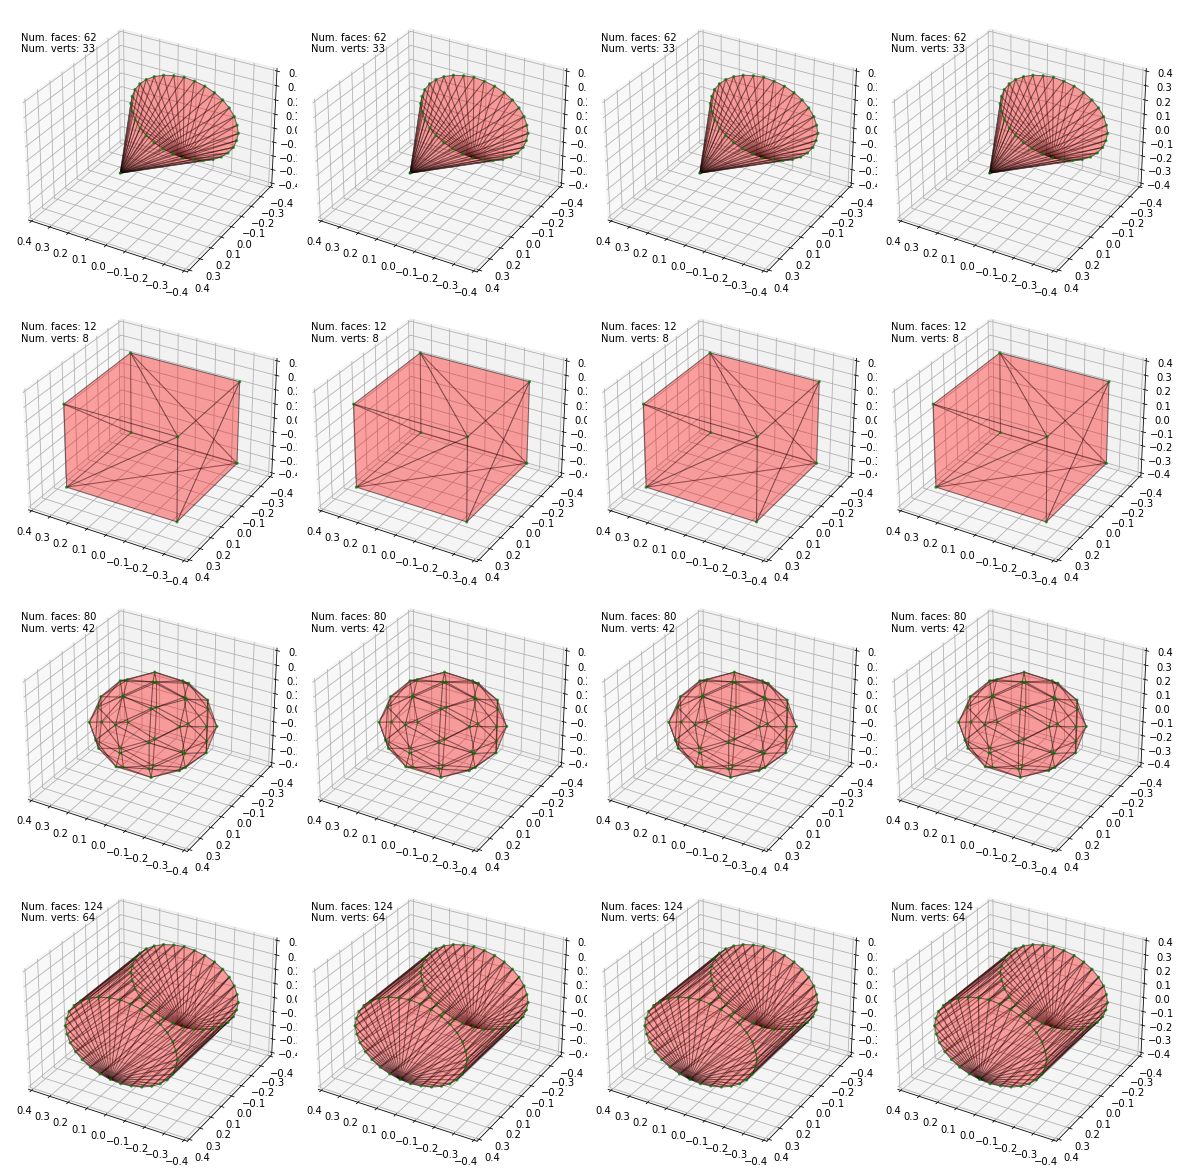

In [4]:
mesh_list = []
for i in range(len(img_dataset)):
    mesh_dict = img_dataset[i]
    curr_verts, curr_faces = mesh_dict['vertices'], mesh_dict['faces']
    curr_verts = data_utils.dequantize_verts(curr_verts).numpy()
    curr_faces = data_utils.unflatten_faces(curr_faces.numpy())
    mesh_list.append({'vertices': curr_verts, 'faces': curr_faces})

data_utils.plot_meshes(mesh_list, ax_lims = 0.4)